In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_X = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis = 'columns')
df_y = df.Survived

In [4]:
df_X.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df_X['le_sex']= le_sex.fit_transform(df_X['Sex'])
df_XX = df_X.drop(['Sex'],axis = 'columns')
df_XX = df_XX.rename(columns={'le_sex':'Sex'})
df_XX.head()

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [6]:
df_XX['Age'] = df_XX.Age.fillna(df_XX.Age.mean())
df_XX['Fare'] = df_XX.Fare.fillna(df_XX.Fare.mean())

df_XX.head()

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [7]:
X = df_XX.drop(['Survived'], axis = 'columns')
y = df_XX.Survived

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [9]:
cross_val_score(RandomForestClassifier(n_estimators =30), X,y)

array([0.77094972, 0.80898876, 0.83146067, 0.83707865, 0.84831461])

In [10]:
cross_val_score(LogisticRegression(), X,y)

array([0.7877095 , 0.78089888, 0.78651685, 0.7752809 , 0.80337079])

In [11]:
cross_val_score(SVC(), X,y)

array([0.5698324 , 0.71348315, 0.69101124, 0.68539326, 0.69101124])

### Using another method

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
Score = []
scr_rng = range(1,40)
for i in scr_rng:
    rnFRST = RandomForestClassifier(n_estimators=i)
    rnFRST.fit(X_train, y_train)
    score_rf = rnFRST.score(X_test, y_test)
    Score.append(score_rf)

Text(0, 0.5, 'Score')

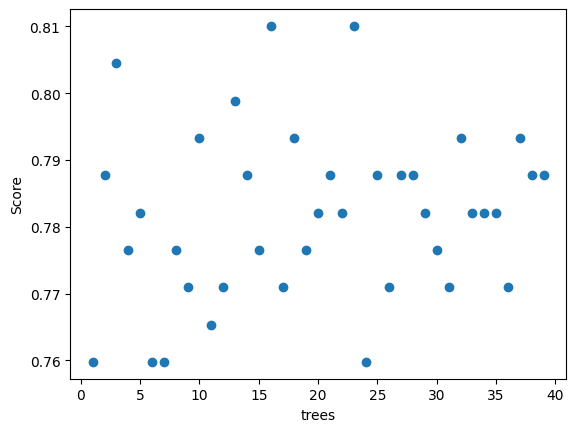

In [18]:
import matplotlib.pyplot as plt
plt.scatter(scr_rng, Score)
plt.xlabel('trees')
plt.ylabel('Score')

### Using GridSearch CV

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [28]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    }
}
    
        

In [62]:
model_params = {
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [15,20,25,30,35],
            'max_depth':[7,15]
        }
    },
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors':[3,5]
    }
}
}
    
        

In [63]:
score = []
for model_name, mp  in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
    
   

,model,best_score,best_params
0,random_forest,0.785078,"{'criterion': 'gini', 'max_depth': 2, 'n_estim..."
1,random_forest,0.825766,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
2,random_forest,0.842638,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
3,random_forest,0.835635,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
4,random_forest,0.835635,"{'max_depth': 7, 'n_estimators': 25}"
5,random_forest,0.832828,"{'max_depth': 7, 'n_estimators': 35}"
6,KNN,0.713513,{'n_neighbors': 5}
